In [50]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython.display import clear_output

%matplotlib inline

In [78]:
DF_PATH = "/Users/dutking/LOCAL/Pathologies_ArtDental_g/Utkin Dmitry/DF.csv"

DATA_DIR = "/Users/dutking/Yandex.Disk-dutking.localized/ИИ"

PROJECTIONS = ["Аксиальная", "Сагитальная", "Корональная"]
AXIAL_SUB = ["Центральное", "Латеральное", "Медиальное"]
SAGITTAL_SUB = ["Центральное", "Компрессия", "Дистракция", "Дистальное", "Мезиальное"]
CORONAL_SUB = ["Центральное", "Компрессия", "Дистракция", "Латеральное", "Медиальное"]

AXIAL_METRICS = ["anterior", "posterior", "medial", "lateral"]
SAGITTAL_METRICS = ["anterior", "superior", "posterior"]
CORONAL_METRICS = ["medial", "lateral", "superior"]

CURRENT_SUB = AXIAL_SUB

In [52]:
img_data = list(os.walk(DATA_DIR))

In [79]:
df = pd.read_csv(DF_PATH, index_col="id")
df["comment"] = ""
df.head(1)

,name,comment,axial.left.anterior,axial.left.posterior,axial.left.medial,axial.left.lateral,axial.right.anterior,axial.right.posterior,axial.right.medial,axial.right.lateral,...,issue.medial.left,issue.medial.right,issue.compression.left,issue.compression.right,issue.distraction.left,issue.distraction.right,issue.distal.left,issue.distal.right,issue.mesial.left,issue.mesial.right
id,,,,,,,,,,,,,,,,,,,,,
1,Останькович В.В.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def get_issue(path):
    issue_name = path.split("/")[-1].split(" ")[1].split(".")[0]
    match issue_name:
        case "Центральное":
            issue_id = "normal"
        case "Латеральное":
            issue_id = "lateral"
        case "Медиальное":
            issue_id = "medial"
        case "Компрессия":
            issue_id = "compression"
        case "Дистракция":
            issue_id = "distraction"
        case "Дистальное":
            issue_id = "distal"
        case "Мезиальное":
            issue_id = "mesial"

    return issue_name, issue_id


def get_projection(path):
    projection_name = path.split("/")[-2].split(" ")[-2]
    match projection_name:
        case "Аксиальная":
            projection_id = "axial"
        case "Сагитальная":
            projection_id = "sagittal"
        case "Корональная":
            projection_id = "coronal"

    return projection_name, projection_id


def get_side(filename):
    if "Л" in filename:
        return "Слева", "left"
    elif "П" in filename:
        return "Справа", "right"


def get_metrics(projection_id):
    match projection_id:
        case "axial":
            return AXIAL_METRICS
        case "sagittal":
            return SAGITTAL_METRICS
        case "coronal":
            return CORONAL_METRICS


def input_metrics(projection_id):
    match projection_id:
        case "axial":
            data = input((" ").join(AXIAL_METRICS))
        case "sagittal":
            data = input((" ").join(SAGITTAL_METRICS))
        case "coronal":
            data = input((" ").join(CORONAL_METRICS))
    return list(map(float, data.strip().split(" ")))


def set_data(df, user_id, projection_id, issue_id, side_id, input_data):
    metrics = get_metrics(projection_id)
    for metric, value in zip(metrics, input_data):
        df.loc[user_id, f"{projection_id}.{side_id}.{metric}"] = value
    if issue_id != "normal":
        df.loc[user_id, f"issue.{issue_id}.side_id"] = 1

259 Казбанова В.С. 14/10/23
К259Лс.png: Сагитальная проекция | Дистальное смещение | Слева


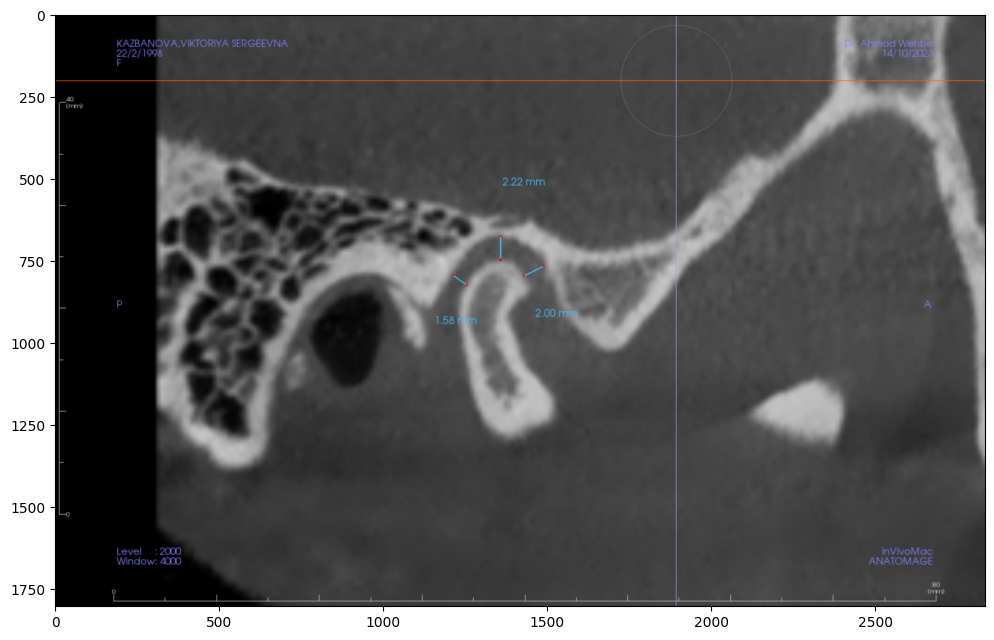

ValueError: could not convert string to float: 'q.58'

In [93]:
for i in df.index:
    if i > 258:
        user_id = i
        user_name = df.loc[i, "name"]
        img_id_1 = f"К{user_id}Л"
        img_id_2 = f"К{user_id}П"
        for root, dirs, files in img_data:
            for file in list(sorted(files)):
                if file.startswith(img_id_1) or file.startswith(img_id_2):
                    print(user_id, user_name)
                    projection_name, projection_id = get_projection(root)
                    issue_name, issue_id = get_issue(root)
                    side_name, side_id = get_side(file)
                    print(
                        f"{file}: {projection_name} проекция | {issue_name} смещение | {side_name}"
                    )
                    image = mpimg.imread(os.path.join(root, file))
                    fig = plt.figure(figsize=(12, 12))
                    plt.imshow(image)
                    plt.show()
                    data = input_metrics(projection_id)
                    set_data(df, user_id, projection_id, issue_id, side_id, data)
                    clear_output(wait=True)
        df.to_csv("DF.csv")